In [1]:
# Author: Eric Vela Hernandez, Hardik Goel
# Date: 12/04/2023
# Description: This file contains the support vector machine model for our dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('data/heart.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [4]:
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

scaler = StandardScaler()
features = data.drop('DEATH_EVENT', axis=1)
features_scaled = scaler.fit_transform(features)

target = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

model = SVC(kernel="linear")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.94      0.85        35
         1.0       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



In [11]:
# param_grid = {
#     'C': np.logspace(-2, 3, 6),
#     'gamma': np.logspace(-5, -1, 6),  
#     'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

# Extend hyperparameter grid with more diverse options
param_grid = {
    'C': np.logspace(-2, 10, 13),
    'gamma': np.logspace(-9, 3, 13),
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'class_weight': [None, 'balanced']  # add class_weight if the dataset is imbalanced
}

cv = StratifiedKFold(n_splits=10, shuffle=True)

grid = GridSearchCV(SVC(), param_grid, scoring='accuracy', refit=True, verbose=3, cv=cv)

grid.fit(X_train, y_train)

Fitting 10 folds for each of 1014 candidates, totalling 10140 fits
[CV 1/10] END C=0.01, class_weight=None, gamma=1e-09, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/10] END C=0.01, class_weight=None, gamma=1e-09, kernel=rbf;, score=0.708 total time=   0.0s
[CV 3/10] END C=0.01, class_weight=None, gamma=1e-09, kernel=rbf;, score=0.708 total time=   0.0s
[CV 4/10] END C=0.01, class_weight=None, gamma=1e-09, kernel=rbf;, score=0.708 total time=   0.0s
[CV 5/10] END C=0.01, class_weight=None, gamma=1e-09, kernel=rbf;, score=0.708 total time=   0.0s
[CV 6/10] END C=0.01, class_weight=None, gamma=1e-09, kernel=rbf;, score=0.708 total time=   0.0s
[CV 7/10] END C=0.01, class_weight=None, gamma=1e-09, kernel=rbf;, score=0.708 total time=   0.0s
[CV 8/10] END C=0.01, class_weight=None, gamma=1e-09, kernel=rbf;, score=0.708 total time=   0.0s
[CV 9/10] END C=0.01, class_weight=None, gamma=1e-09, kernel=rbf;, score=0.708 total time=   0.0s
[CV 10/10] END C=0.01, class_weight=None, gamma=1e-

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'class_weight': [None, 'balanced'],
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [12]:
# print(grid.best_params_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85        35
         1.0       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60



[[33  2]
 [10 15]]


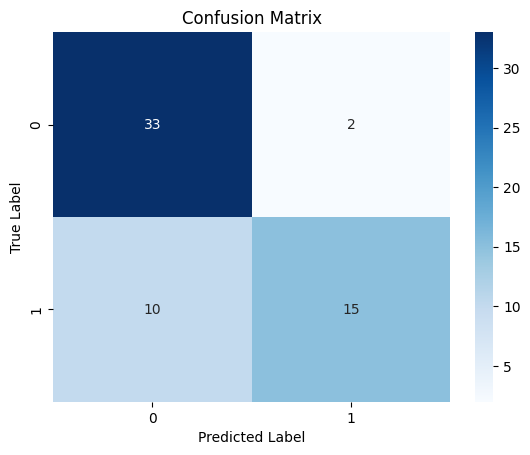

In [14]:
cm = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# plt.show()
print(cm)

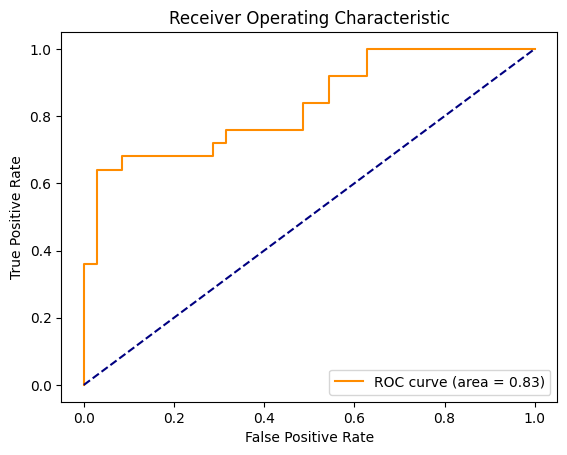

In [20]:
y_pred_proba = best_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

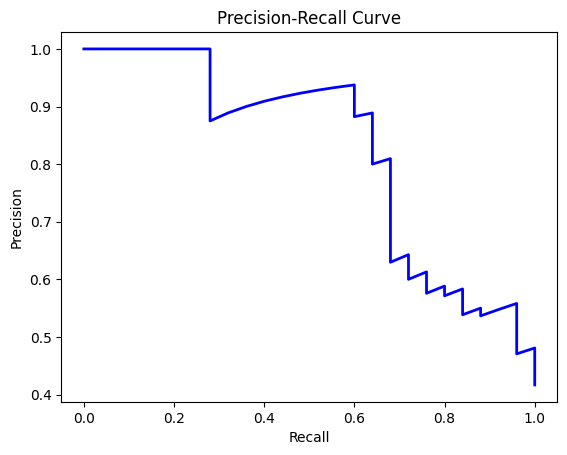

In [16]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()